Importing required libraries

In [88]:
import pandas as pd
import ntr
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
tqdm.pandas()

Importing required datasets

In [89]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")
df3 = pd.read_csv("dataset3.csv")
df3.head()

,text,label
0,सबै जना गुलाबमा काडा,nu
1,छ भनेर गनगन गर्छन,nu
2,म आफैलाई गर्व गर्छु,p
3,त्यो काडामा तिमी जस्तो गुलाब जो फुलेको छौचाहे ...,p
4,या गलत तिम्रा बारे नकरात्मक सोच राख्ने मानिसहर...,n


Converting nu, p, n labels to 1,2,0

In [90]:
def check_sentiment(row):
  if row["label"] == "p":
    return "1"
  elif row["label"] == "n":
    return "0"
  else:
    return "2"
  
df3["label"] = df3.apply(check_sentiment, axis = 1)

df3.head()

,text,label
0,सबै जना गुलाबमा काडा,2
1,छ भनेर गनगन गर्छन,2
2,म आफैलाई गर्व गर्छु,1
3,त्यो काडामा तिमी जस्तो गुलाब जो फुलेको छौचाहे ...,1
4,या गलत तिम्रा बारे नकरात्मक सोच राख्ने मानिसहर...,0


Concatenating all the datasets

In [91]:
df = pd.concat([df1, df2, df3])
df.head()

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1


Checking for bad labels

In [92]:
df["label"].value_counts()

label
1     3560
0     3247
2     1878
-        6
o        2
20       1
11       1
--       1
Name: count, dtype: int64

Removing bad labels and empty rows

In [93]:
df = df[df["label"].isin(["1","2","0"])]
df["label"].value_counts()
df = df.dropna()

In [94]:
df["text"] = df.progress_apply(lambda row : ntr.nep_to_rom(row["text"]), axis = 1)

100%|██████████| 8683/8683 [00:18<00:00, 460.32it/s]


In [95]:
df.to_csv("romanized_dataset.csv")

<Axes: xlabel='label'>

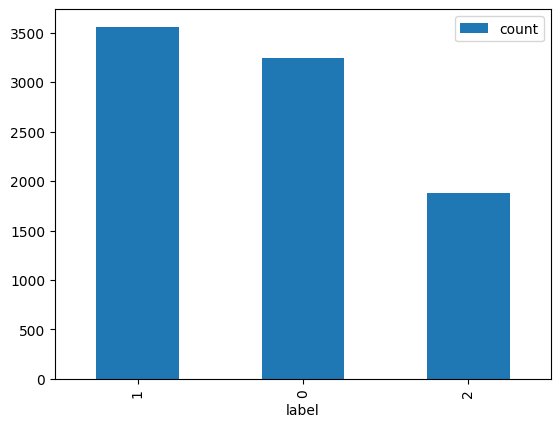

In [96]:
data = df["label"].value_counts()
data = data.reset_index()
data.plot.bar(x = "label", y = "count")